In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv('Clothing_Reviews.csv')

# Hapus baris yang kosong di kolom penting
df = df[['Review Text', 'Rating']].dropna()

# Binerisasi rating: rating >= 4 dianggap positif (1), sisanya negatif (0)
df['Label'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# TF-IDF vektorisasi teks
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Review Text']).toarray()
y = df['Label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))



=== Logistic Regression ===
[[ 640  405]
 [ 152 3332]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1045
           1       0.89      0.96      0.92      3484

    accuracy                           0.88      4529
   macro avg       0.85      0.78      0.81      4529
weighted avg       0.87      0.88      0.87      4529



Confusion Matrix:
 [[ 640  405]
 [ 152 3332]]


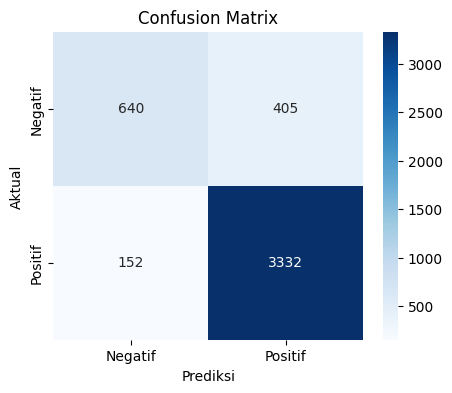

In [25]:
# Tambahan: Confusion Matrix (angka)
cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:\n", cm)

# Tambahan: Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()